In [6]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from pycaret.regression import *

In [7]:
pwd

'C:\\Users\\joshu\\OneDrive\\Desktop\\progress'

In [8]:
#Loading dataset
df = pd.read_csv('C:/Users/joshu/OneDrive/Desktop/progress/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,43,male,32.600,2,no,other,74415.0100
1,52,female,37.525,2,no,kisumu,334719.7189
2,18,female,39.160,0,no,nairobi,16330.4440
3,51,male,31.635,0,no,kisumu,91741.3565
4,56,female,25.300,0,no,other,110705.3500


In [9]:
# Detail of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   object 
 2   bmi       1000 non-null   float64
 3   children  1000 non-null   int64  
 4   smoker    1000 non-null   object 
 5   region    1000 non-null   object 
 6   charges   1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [10]:
print('rows:', df.shape[0]," ",'columns:', df.shape[1]) 

rows: 1000   columns: 7


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,39.608000,14.157428,18.000,27.000000,40.000,52.000000,64.0000
bmi,1000.0,30.875325,6.051370,15.960,26.600000,30.590,35.162500,50.3800
children,1000.0,1.083000,1.199813,0.000,0.000000,1.000,2.000000,5.0000
charges,1000.0,130730.571935,119879.879412,11218.739,47115.922875,92830.213,158827.954375,637704.2801


In [12]:
df.describe(include=['object']).T

,count,unique,top,freq
sex,1000,2,male,505
smoker,1000,2,no,804
region,1000,4,nairobi,279


NameError: name 'sns' is not defined

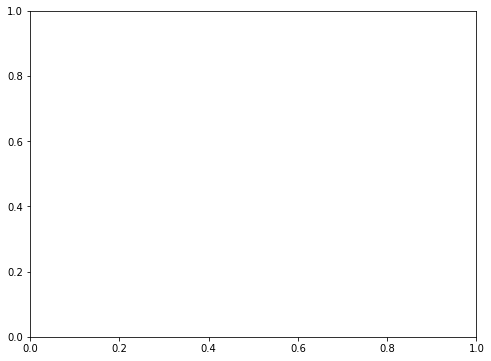

In [13]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize = (8,6))
ax = sns.barplot(x = charges.head().index, y = charges.head())

NameError: name 'sns' is not defined

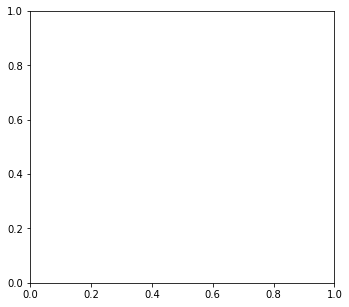

In [14]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(df.charges, color = 'b')

NameError: name 'sns' is not defined

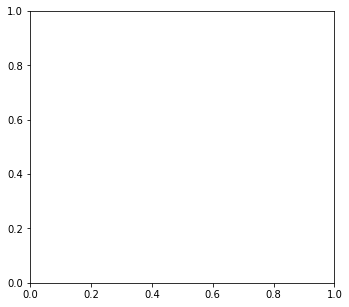

In [15]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(df.age, color = 'b').set_title('Distribution of age')

plt.subplot(122)
sns.distplot(df.bmi, color = 'b').set_title('Distribution of BMI')

NameError: name 'sns' is not defined

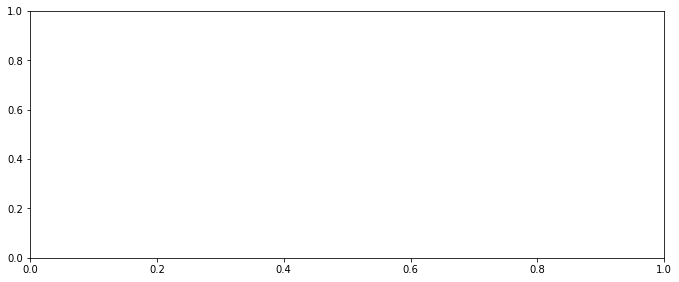

In [16]:
plt.figure (figsize = (25,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'region', y = 'charges', data = df)

plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = df)

plt.subplot(2,2,3)
sns.boxplot(x = 'sex', y = 'charges', data = df)

plt.subplot(2,2,4)
sns.boxplot(x = 'smoker', y = 'charges', data = df)

In [17]:
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

NameError: name 'sns' is not defined

In [18]:
s2 = setup(df, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1000, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(699, 57)"


In [20]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,23421.4955,1960548879.7775,43998.5567,0.8533,0.3839,0.2557,0.1120
ridge,Ridge Regression,27128.3490,2053020736.0000,45077.6918,0.8474,0.3905,0.2690,0.0180
br,Bayesian Ridge,27214.1280,2053291891.3642,45073.2835,0.8474,0.3894,0.2702,0.0150
lasso,Lasso Regression,27218.8184,2072567155.2000,45316.6992,0.8458,0.3975,0.2706,0.0390
lr,Linear Regression,27234.7107,2074005260.8000,45332.9969,0.8457,0.3980,0.2709,1.1440
llar,Lasso Least Angle Regression,27618.2097,2092292457.9736,45564.9178,0.8457,0.4001,0.2810,0.0280
omp,Orthogonal Matching Pursuit,26449.0516,2094855853.3856,45577.4956,0.8454,0.3657,0.2470,0.0140
rf,Random Forest Regressor,24074.6798,2075541994.6691,45217.4428,0.8441,0.4135,0.2651,0.2820
lightgbm,Light Gradient Boosting Machine,26624.6181,2090154141.4787,45394.2828,0.8432,0.4663,0.3209,0.0600
catboost,CatBoost Regressor,25638.7578,2211972996.3647,46755.1744,0.8354,0.4252,0.2981,3.4420


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18927.1294,1564802379.0833,39557.5831,0.8776,0.3433,0.2014
1,19879.6520,1382185237.1259,37177.7519,0.9210,0.2888,0.1976
2,23482.7758,2182878585.1593,46721.2862,0.7204,0.4387,0.2084
3,24635.6176,2058057561.0187,45365.8193,0.8556,0.3832,0.2667
4,23348.3248,1564248579.1586,39550.5825,0.9178,0.3840,0.2810
5,24436.0279,2471839589.1121,49717.5984,0.8496,0.3957,0.2737
6,25524.5246,2259383733.3943,47532.9752,0.8361,0.3888,0.2347
7,27069.8313,2282348012.5104,47773.9261,0.8062,0.4128,0.3355
8,21168.1532,1335803023.0993,36548.6391,0.8952,0.4063,0.2911
9,25742.9179,2503942098.1135,50039.4055,0.8535,0.3979,0.2665


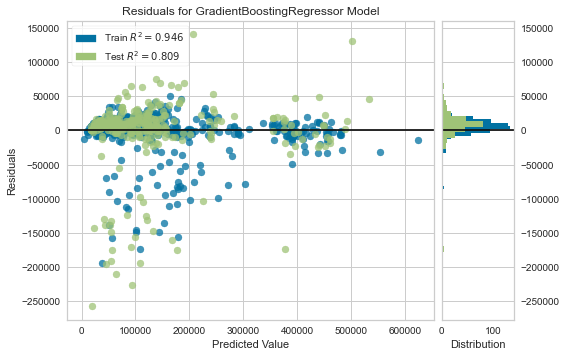

In [22]:
plot_model(gbr)

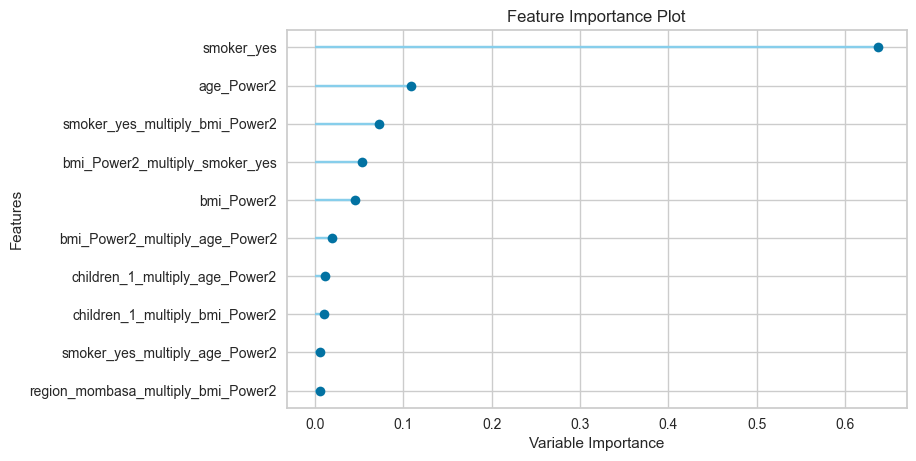

In [23]:
plot_model(gbr, plot='feature')

In [80]:
save_model(gbr, 'C:/Users/joshu/OneDrive/Desktop/progress/deployment_11062020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           

In [81]:
deployment_11062020 = load_model('C:/Users/joshu/OneDrive/Desktop/progress/deployment_11062020')

Transformation Pipeline and Model Successfully Loaded


In [82]:
deployment_11062020

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           